In [28]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [29]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [30]:
X_train.shape



(60000, 28, 28)

In [31]:
y_train.shape

(60000,)

In [32]:
X_test.shape

(10000, 28, 28)

In [33]:
y_test.shape

(10000,)

In [34]:
import numpy as np
# Assuming y_train is your target labels
num_classes = len (np.unique(y_train))
print("Number of classes: ", num_classes)

Number of classes:  10


In [35]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

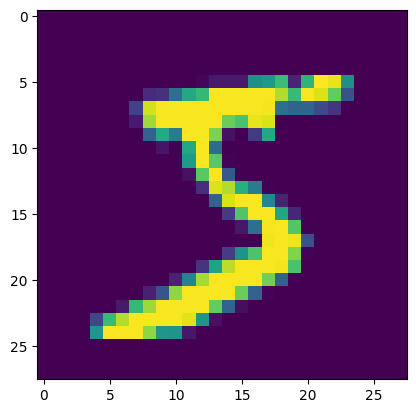

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])


In [37]:
X_train = X_train/255
X_test = X_test/255

In [38]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(10, activation='softmax'))

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [62]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 22s 13ms/step - loss: 0.2280 - accuracy: 0.9305 - val_loss: 0.0642 - val_accuracy: 0.9803
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0892 - accuracy: 0.9736 - val_loss: 0.0483 - val_accuracy: 0.9852
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0485 - val_accuracy: 0.9864
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0541 - accuracy: 0.9844 - val_loss: 0.0396 - val_accuracy: 0.9881
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0430 - accuracy: 0.9869 - val_loss: 0.0399 - val_accuracy: 0.9884
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0373 - accuracy: 0.9883 - val_loss: 0.0363 - val_accuracy: 0.9902
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0310 - accuracy: 0.9894 - val_loss: 0.0383 -

In [63]:
y_prob = model.predict(X_test)
print(y_prob)

313/313 [==============================] - 2s 5ms/step
[[1.9447222e-15 9.9333291e-13 2.5788047e-09 ... 1.0000000e+00
  3.7324061e-11 4.5827861e-10]
 [2.0470608e-13 1.8358716e-11 1.0000000e+00 ... 8.2575215e-18
  2.3824957e-12 2.3197068e-18]
 [1.3883321e-13 1.0000000e+00 6.1565378e-11 ... 2.2221356e-09
  3.6404588e-09 4.9868953e-11]
 ...
 [1.2978602e-20 1.0948097e-14 3.2964270e-18 ... 6.5625686e-15
  3.2227512e-10 1.4981938e-12]
 [2.3027193e-11 5.4358404e-14 3.8651579e-15 ... 1.6235835e-15
  2.5397570e-05 1.3590365e-10]
 [7.3463374e-11 6.4467313e-11 2.6218940e-09 ... 1.9245333e-20
  1.3396255e-09 2.8829308e-15]]


In [64]:
y_pred = y_prob.argmax (axis=1)

In [65]:
print(y_pred)

[7 2 1 ... 4 5 6]


In [66]:
# Assuming you have a list or array of class labels
class_labels = ['class_0', 'class_1', 'class_2', 'class_3','class_4', 'class_5', 'class_6', 'class_7','class_8','class_9']
# Mapping indices to class labels
y_pred_classes = [class_labels[i] for i in y_pred]

In [67]:
y_pred_classes

['class_7',
 'class_2',
 'class_1',
 'class_0',
 'class_4',
 'class_1',
 'class_4',
 'class_9',
 'class_8',
 'class_9',
 'class_0',
 'class_6',
 'class_9',
 'class_0',
 'class_1',
 'class_5',
 'class_9',
 'class_7',
 'class_3',
 'class_4',
 'class_9',
 'class_6',
 'class_6',
 'class_5',
 'class_4',
 'class_0',
 'class_7',
 'class_4',
 'class_0',
 'class_1',
 'class_3',
 'class_1',
 'class_3',
 'class_4',
 'class_7',
 'class_2',
 'class_7',
 'class_1',
 'class_2',
 'class_1',
 'class_1',
 'class_7',
 'class_4',
 'class_2',
 'class_3',
 'class_5',
 'class_1',
 'class_2',
 'class_4',
 'class_4',
 'class_6',
 'class_3',
 'class_5',
 'class_5',
 'class_6',
 'class_0',
 'class_4',
 'class_1',
 'class_9',
 'class_5',
 'class_7',
 'class_8',
 'class_9',
 'class_3',
 'class_7',
 'class_4',
 'class_6',
 'class_4',
 'class_3',
 'class_0',
 'class_7',
 'class_0',
 'class_2',
 'class_9',
 'class_1',
 'class_7',
 'class_3',
 'class_2',
 'class_9',
 'class_7',
 'class_7',
 'class_6',
 'class_2',
 'cl

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test, y_pred)

0.9906

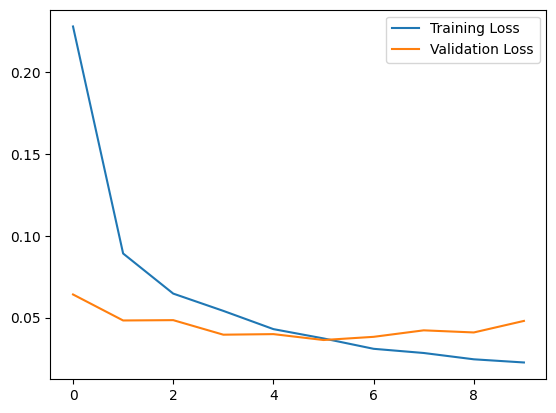

In [69]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

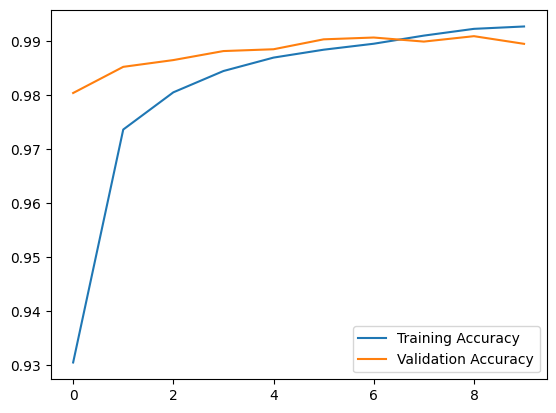

In [70]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

1/1 [==============================] - 0s 53ms/step


array([2], dtype=int64)

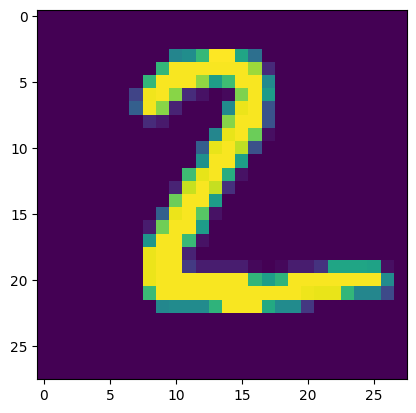

In [71]:
plt.imshow(X_test[1])
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

In [72]:
model.save("mnist_model.h5")

C:\Users\JUBER B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
